<a href="https://colab.research.google.com/github/MokshBuddhadev/credit-risk-assessment/blob/main/02_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)
df.rename(columns={"default payment next month": "default"}, inplace=True)
df.shape

(30000, 25)

In [2]:
X = df.drop("default", axis=1)
y = df["default"]
X.shape, y.shape

((30000, 24), (30000,))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_train.shape, X_test.shape

((24000, 24), (6000, 24))

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1]))

Confusion Matrix:
 [[4528  145]
 [1007  320]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


ROC-AUC Score: 0.7077767695290056


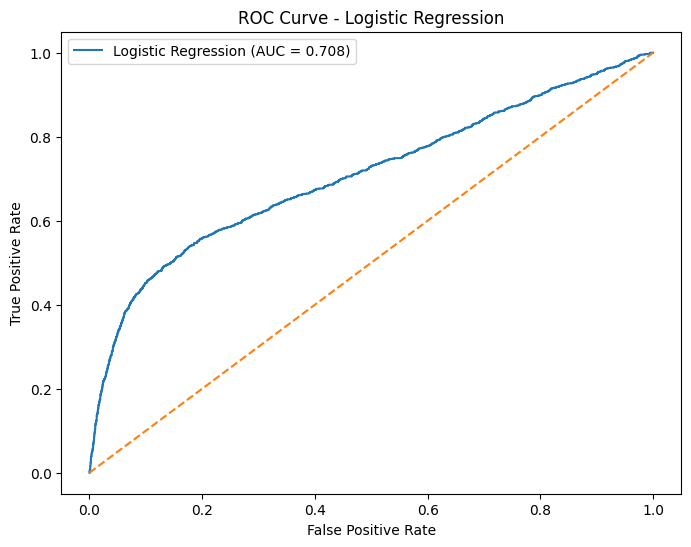

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_probs = log_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_probs = dt_model.predict_proba(X_test)[:,1]

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:,1]

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_probs = gb_model.predict_proba(X_test)[:,1]

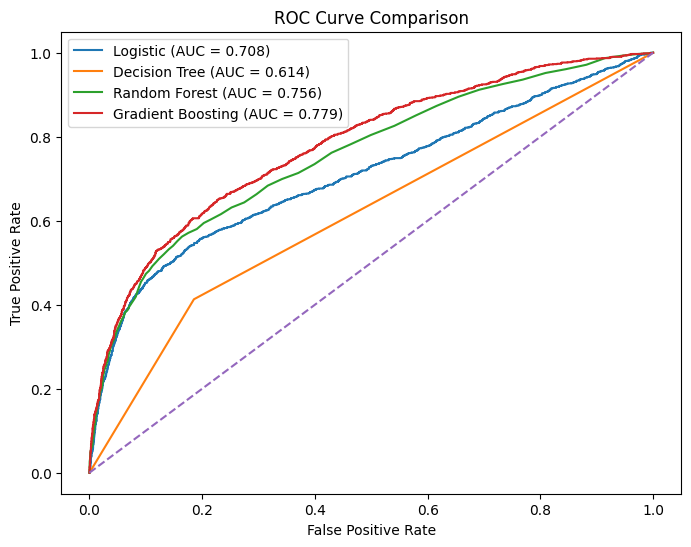

In [11]:
plt.figure(figsize=(8,6))

# Logistic
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs)
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {auc(fpr_log, tpr_log):.3f})")

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.3f})")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.3f})")

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc(fpr_gb, tpr_gb):.3f})")

# Diagonal reference
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [12]:
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

models = {
    "Logistic Regression": (log_model, X_test_scaled),
    "Decision Tree": (dt_model, X_test),
    "Random Forest": (rf_model, X_test),
    "Gradient Boosting": (gb_model, X_test)
}

results = []

for name, (model, X_eval) in models.items():
    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="ROC-AUC", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
3,Gradient Boosting,0.819333,0.668516,0.363225,0.470703,0.779022
2,Random Forest,0.814667,0.642008,0.366240,0.466411,0.756444
0,Logistic Regression,0.808000,0.688172,0.241145,0.357143,0.707777
1,Decision Tree,0.725833,0.387553,0.412962,0.399854,0.613821
